<a href="https://colab.research.google.com/github/JManuelRG/simuladores/blob/main/Ejemplo_COBRA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo: Optimización de la Producción de Etanol en Escherichia coli

# Objetivo:
Maximizar la producción de etanol bajo condiciones de restricción de oxígeno, simulando un entorno anaeróbico.



In [2]:
!pip install cobra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.8/141.8 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.2/722.2 kB 37.0 MB/s eta 0:00:00


In [ ]:
# Cargar el modelo metabólico
from cobra.io import load_model

model = load_model("textbook") #importar modelo de e coli

In [ ]:
model.summary() #resumen del modelo

Metabolite,Reaction,Flux,C-Number,C-Flux
glc__D_e,EX_glc__D_e,10,6,100.00%
nh4_e,EX_nh4_e,4.765,0,0.00%
o2_e,EX_o2_e,21.8,0,0.00%
pi_e,EX_pi_e,3.215,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_e,-22.81,1,100.00%
h2o_e,EX_h2o_e,-29.18,0,0.00%
h_e,EX_h_e,-17.53,0,0.00%


In [ ]:
model.reactions.get_by_id("EX_etoh_e")

Reaction identifier,EX_etoh_e
Name,Ethanol exchange
Memory address,0x7f3d90107fa0
Stoichiometry,etoh_e --> Ethanol -->
GPR,
Lower bound,0.0
Upper bound,1000.0


# Reacciones posibles

In [ ]:
# Listar las reacciones disponibles para identificar el intercambio de etanol y oxígeno
for reaction in model.reactions:
    if "EX_etoh_e" in reaction.id or "EX_o2_e" in reaction.id:
        print(f"Reacción: {reaction.id}, Nombre: {reaction.name}")

Reacción: EX_etoh_e, Nombre: Ethanol exchange
Reacción: EX_o2_e, Nombre: O2 exchange


In [ ]:
# Establecer la reacción objetivo: maximizar la producción de etanol
# E Coli produzca etanol (maximizar)
model.objective = "EX_etoh_e"

In [ ]:
model.objective.variables

{0 <= EX_etoh_e <= 1000.0, 0 <= EX_etoh_e_reverse_cc64f <= -0.0}

In [ ]:
# Restricciones
# Restringir el consumo de oxígeno para simular condiciones anaeróbicas
model.reactions.get_by_id("EX_o2_e").upper_bound = 0.0  # No hay consumo de oxígeno
# Condiciones anaerobias


In [ ]:
# Restringir la disponibilidad de glucosa
model.reactions.get_by_id("EX_glc__D_e").lower_bound = -10.0  # mmol/gDW/h


En modelos metabólicos basados en el análisis de balance de flujo (FBA), como los implementados en COBRApy, las propiedades lower_bound y upper_bound se utilizan para definir los límites de los flujos en una reacción metabólica. Estos límites controlan la cantidad mínima y máxima de flujo que puede pasar por una reacción, estableciendo restricciones que reflejan las condiciones ambientales o experimentales.

Definición de los límites:
lower_bound (límite inferior):

Representa el flujo mínimo permitido en una reacción.
Si es negativo, indica que la reacción puede consumir un metabolito del entorno.
Si es cero, la reacción no puede ocurrir en la dirección de consumo.
Si es positivo, establece un flujo mínimo en la dirección de producción.
upper_bound (límite superior):

Representa el flujo máximo permitido en una reacción.
Si es positivo, limita cuánto flujo máximo puede pasar en la reacción.
Si es cero, bloquea completamente la reacción en cualquier dirección.
Si es negativo, restringe el flujo en la dirección opuesta.
Interpretación práctica:
Reacciones de intercambio (EX_*):

Estas reacciones modelan el transporte de metabolitos entre la célula y su entorno.
Por ejemplo:
En 'EX_glc__D_e', el límite inferior -10.0 indica que la célula puede consumir hasta 10 mmol de glucosa por gramo de peso seco celular (gDW) por hora.
El límite superior, si no está definido explícitamente, suele ser grande (como 1000 mmol/gDW/h), indicando que no hay restricciones importantes para la exportación de glucosa.
Reacciones internas:

Controlan el metabolismo celular dentro de la red.
Por ejemplo:
Una reacción con lower_bound = 0 y upper_bound = 1000 solo permite flujo positivo, indicando que ocurre en una sola dirección.

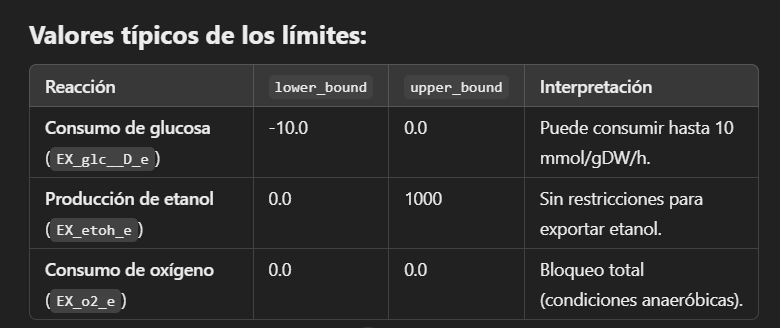

In [ ]:
# Ejecutar la optimización
solution = model.optimize()

In [ ]:
solution

,fluxes,reduced_costs
ACALD,-2.000000e+01,3.709793e-16
ACALDt,0.000000e+00,-0.000000e+00
ACKr,3.504589e-15,-0.000000e+00
ACONTa,0.000000e+00,-0.000000e+00
ACONTb,0.000000e+00,4.946390e-16
...,...,...
TALA,3.279401e-16,-0.000000e+00
THD2,-8.552575e-15,-6.090077e-17
TKT1,-3.649001e-16,2.041897e-16
TKT2,3.279401e-16,-0.000000e+00


In [ ]:
type(solution)

cobra.core.solution.Solution

In [ ]:
solution.fluxes

,fluxes
ACALD,-2.000000e+01
ACALDt,0.000000e+00
ACKr,0.000000e+00
ACONTa,0.000000e+00
ACONTb,0.000000e+00
...,...
TALA,-5.920114e-16
THD2,-3.032866e-15
TKT1,-1.284852e-15
TKT2,-5.920114e-16


In [ ]:
round(solution.objective_value,4)

20.0

In [ ]:

# Mostrar el valor de la función objetivo (producción de etanol)
print(f"Producción de etanol: {solution.objective_value:.4f} mmol/gDW/h")

Producción de etanol: 20.0000 mmol/gDW/h


In [ ]:

# Mostrar los flujos principales
print("\nFlujos principales:")
for reaction in model.reactions:
    if abs(reaction.flux) > 1e-6:  # Mostrar solo flujos significativos
        print(f"{reaction.id}: {reaction.flux:.4f} mmol/gDW/h")


Flujos principales:
ACALD: -20.0000 mmol/gDW/h
ALCD2x: -20.0000 mmol/gDW/h
ATPM: 25.0000 mmol/gDW/h
ATPS4r: 5.0000 mmol/gDW/h
CO2t: -20.0000 mmol/gDW/h
ENO: 20.0000 mmol/gDW/h
ETOHt2r: -20.0000 mmol/gDW/h
EX_co2_e: 20.0000 mmol/gDW/h
EX_etoh_e: 20.0000 mmol/gDW/h
EX_glc__D_e: -10.0000 mmol/gDW/h
FBA: 10.0000 mmol/gDW/h
GAPD: 20.0000 mmol/gDW/h
GLCpts: 10.0000 mmol/gDW/h
PDH: 20.0000 mmol/gDW/h
PFK: 10.0000 mmol/gDW/h
PGI: 10.0000 mmol/gDW/h
PGK: -20.0000 mmol/gDW/h
PGM: -20.0000 mmol/gDW/h
PYK: 10.0000 mmol/gDW/h
TPI: 10.0000 mmol/gDW/h


In [ ]:
model.reactions

[<Reaction ACALD at 0x7f3d9005caf0>,
 <Reaction ACALDt at 0x7f3d9005f3d0>,
 <Reaction ACKr at 0x7f3d9005f250>,
 <Reaction ACONTa at 0x7f3d90a4b160>,
 <Reaction ACONTb at 0x7f3d90a496f0>,
 <Reaction ACt2r at 0x7f3d90a4bcd0>,
 <Reaction ADK1 at 0x7f3d9005ca30>,
 <Reaction AKGDH at 0x7f3d9005d270>,
 <Reaction AKGt2r at 0x7f3d90a492a0>,
 <Reaction ALCD2x at 0x7f3d90a49ba0>,
 <Reaction ATPM at 0x7f3d90a49480>,
 <Reaction ATPS4r at 0x7f3d9005cc10>,
 <Reaction Biomass_Ecoli_core at 0x7f3d90a48df0>,
 <Reaction CO2t at 0x7f3d90a4bc70>,
 <Reaction CS at 0x7f3d90a49e40>,
 <Reaction CYTBD at 0x7f3d90a48d00>,
 <Reaction D_LACt2 at 0x7f3d90a474f0>,
 <Reaction ENO at 0x7f3d90107f40>,
 <Reaction ETOHt2r at 0x7f3d90a46ec0>,
 <Reaction EX_ac_e at 0x7f3d90a45bd0>,
 <Reaction EX_acald_e at 0x7f3d90a445b0>,
 <Reaction EX_akg_e at 0x7f3d90a46710>,
 <Reaction EX_co2_e at 0x7f3d90a46830>,
 <Reaction EX_etoh_e at 0x7f3d90107fa0>,
 <Reaction EX_for_e at 0x7f3d90106920>,
 <Reaction EX_fru_e at 0x7f3d901061d0>,
 

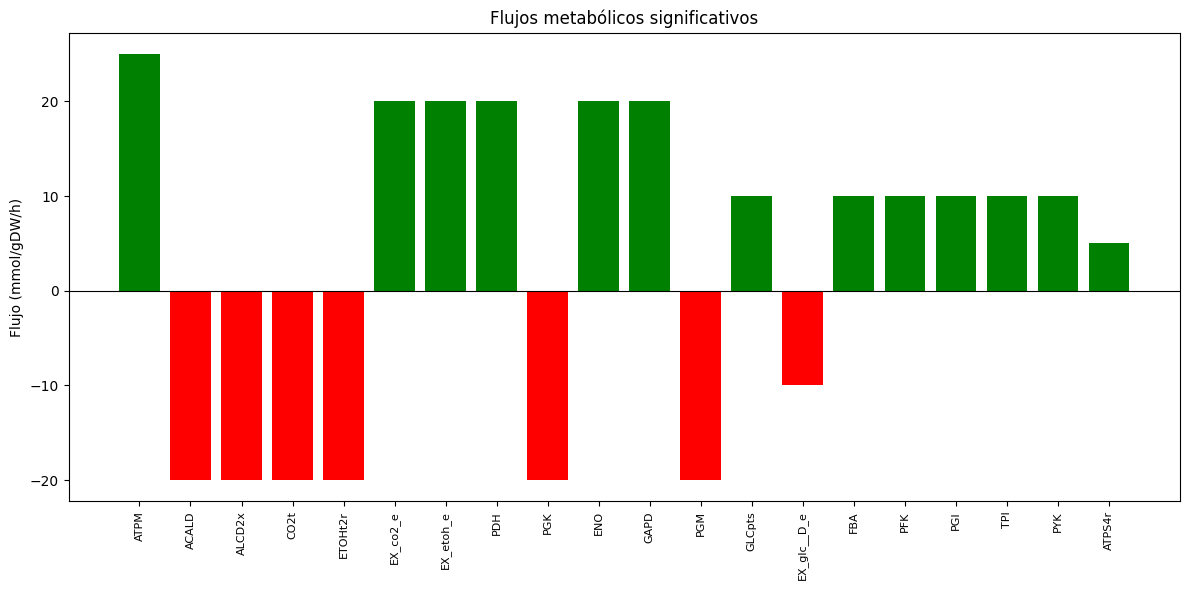

In [5]:
import matplotlib.pyplot as plt
from cobra.io import load_model
import numpy as np
import cobra

# Cargar el modelo de prueba de E. coli
model = load_model("textbook") #importar modelo de e coli


# Establecer las condiciones del modelo
model.objective = "EX_etoh_e"  # Maximizar la producción de etanol
model.reactions.get_by_id("EX_o2_e").upper_bound = 0.0  # Condiciones anaeróbicas
model.reactions.get_by_id("EX_glc__D_e").lower_bound = -10.0  # Límite de glucosa

# Optimizar el modelo
solution = model.optimize()

# Extraer flujos significativos
threshold = 1e-6  # Definir un umbral para filtrar flujos insignificantes
significant_fluxes = {
    reaction.id: reaction.flux
    for reaction in model.reactions
    if abs(reaction.flux) > threshold
}

# Ordenar los flujos en orden descendente
sorted_fluxes = sorted(significant_fluxes.items(), key=lambda x: abs(x[1]), reverse=True)

# Separar claves (reacciones) y valores (flujos) para graficar
reactions, fluxes = zip(*sorted_fluxes)

# Generar el gráfico de barras
plt.figure(figsize=(12, 6))
bar_width = 0.8
bar_positions = np.arange(len(reactions))
colors = ["green" if flux > 0 else "red" for flux in fluxes]  # Verde para producción, rojo para consumo

plt.bar(bar_positions, fluxes, color=colors, width=bar_width)
plt.axhline(0, color="black", linewidth=0.8)  # Línea horizontal en y=0

# Configurar etiquetas y títulos
plt.xticks(bar_positions, reactions, rotation=90, fontsize=8)
plt.ylabel("Flujo (mmol/gDW/h)")
plt.title("Flujos metabólicos significativos")
plt.tight_layout()  # Ajustar diseño para evitar recortes
plt.show()
